In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import sklearn

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn import *


In [2]:
import pathlib
#  dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path( 'C:\\Users\\14054\\Desktop\\work\\Images\\sample\\Classification\\train')



In [3]:
data_dir

WindowsPath('C:/Users/14054/Desktop/work/Images/sample/Classification/train')

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


717


In [5]:
batch_size = 32
img_height = 337
img_width = 240


In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 717 files belonging to 2 classes.
Using 574 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 717 files belonging to 2 classes.
Using 143 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)


['bad', 'good']


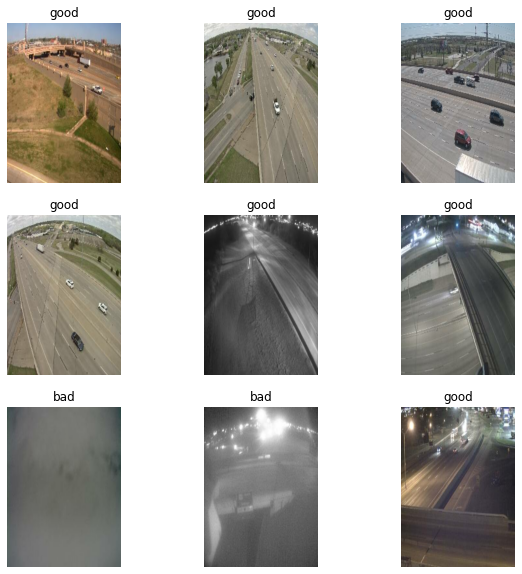

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [10]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(32, 337, 240, 3)
(32,)


In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [12]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.08627451 1.0


In [14]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 337, 240, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 337, 240, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 168, 120, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 168, 120, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 60, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 84, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 42, 30, 64)        0

In [17]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
18/18 [==============================] - 11s 618ms/step - loss: 0.6763 - accuracy: 0.8293 - val_loss: 0.4909 - val_accuracy: 0.8462
Epoch 2/10
18/18 [==============================] - 10s 565ms/step - loss: 0.2825 - accuracy: 0.9007 - val_loss: 0.4096 - val_accuracy: 0.8811
Epoch 3/10
18/18 [==============================] - 10s 567ms/step - loss: 0.1995 - accuracy: 0.9425 - val_loss: 0.3418 - val_accuracy: 0.8881
Epoch 4/10
18/18 [==============================] - 10s 575ms/step - loss: 0.1638 - accuracy: 0.9408 - val_loss: 0.2646 - val_accuracy: 0.9301
Epoch 5/10
18/18 [==============================] - 10s 579ms/step - loss: 0.0895 - accuracy: 0.9669 - val_loss: 0.2715 - val_accuracy: 0.9650
Epoch 6/10
18/18 [==============================] - 11s 593ms/step - loss: 0.0691 - accuracy: 0.9791 - val_loss: 0.2800 - val_accuracy: 0.9650
Epoch 7/10
18/18 [==============================] - 10s 568ms/step - loss: 0.0361 - accuracy: 0.9895 - val_loss: 0.3185 - val_accuracy: 0.9790

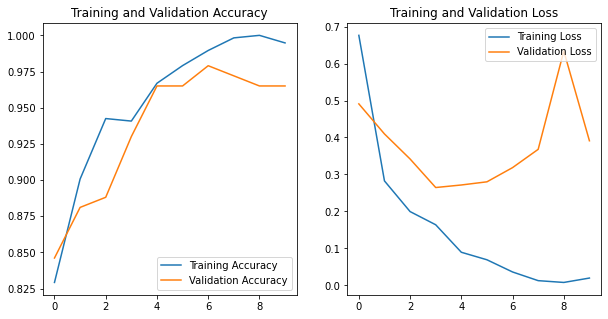

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [19]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
bad = 'C:\\Users\\14054\\Desktop\\work\\Images\\sample\\Classification\\test\\bad\\10_16_30_19_6969_0.jpg'
img = keras.preprocessing.image.load_img(
    bad, target_size=(img_height, img_width)
) 
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to bad with a 100.00 percent confidence.


In [24]:
y_pred=model.predict(val_ds)
model.save('C:\\Users\\14054\\Desktop\\work')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\14054\Desktop\work\assets


In [21]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [22]:
true_categories = tf.concat([y for x, y in val_ds], axis=0)

In [23]:
sklearn.metrics.confusion_matrix(predicted_categories, true_categories, labels=None, sample_weight=None, normalize=None)

array([[ 17,   0],
       [  5, 121]], dtype=int64)